Embeddings have been loaded from a pickle file.


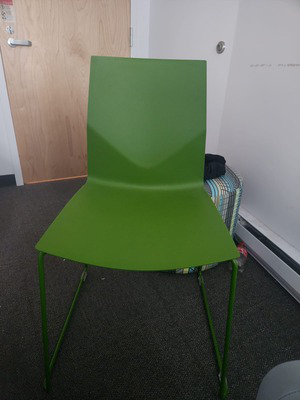

             car: 98.42%
             bus: 0.92%
             cup: 0.58%
           table: 0.08%
           chair: 0.00%


In [1]:
from PIL import Image
from IPython.display import display
from zero_shot_classifier import ZeroShotClassifier
from vlm.clip_vlm import Clip
from vlm.raclip_vanilla import RaClipVanilla

clf = ZeroShotClassifier()
model = RaClipVanilla()

image = Image.open("./chair.jpeg")
display(image)
clf.predict(model, image, ["table", "chair", "cup", "bus", "car"])

In [2]:
import utils
from torchvision.datasets import CIFAR100, CIFAR10, Caltech101

cifar10_testset = CIFAR10(root='.cache/datasets', download=True, train=False, transform=model.preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, cifar10_testset, cifar10_testset.classes)
utils.save_result(model_name, dataset_name, accuracy)

cifar100_testset = CIFAR100(root='.cache/datasets', download=True, train=False, transform=model.preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, cifar100_testset, cifar100_testset.classes)
utils.save_result(model_name, dataset_name, accuracy)

caltech101_testset = Caltech101(root='.cache/datasets', download=True, transform=model.preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, caltech101_testset, caltech101_testset.categories)
utils.save_result(model_name, dataset_name, accuracy)

Files already downloaded and verified


  6%|▌         | 6/100 [00:06<01:41,  1.08s/it][E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument



KeyboardInterrupt: 

In [3]:
import utils

# utils.clear_results()
utils.display_results()

╒════════════╤════════╤══════════════════╕
│            │   Clip │   RaClip Vanilla │
╞════════════╪════════╪══════════════════╡
│ CIFAR10    │  88.8  │            86.27 │
├────────────┼────────┼──────────────────┤
│ CIFAR100   │  61.71 │            61.35 │
├────────────┼────────┼──────────────────┤
│ Caltech101 │  85.01 │            86.44 │
╘════════════╧════════╧══════════════════╛
